In [3]:
#libariries
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

In [4]:
#preproccessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
Housing_data = pd.read_csv('egypt_House_prices (1).csv')

In [6]:
Housing_data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [7]:
Housing_data["Level"].unique()

array(['7', '10+', '1', '10', 'Ground', 'Highest', '3', '2', '4', '9',
       '5', '8', '6', 'Unknown'], dtype=object)

In [8]:
Housing_data['Level'] = Housing_data['Level'].replace('Ground','1')
Housing_data["Level"] = Housing_data["Level"].replace("10+","11")
Housing_data["Level"] = Housing_data["Level"].replace("Highest","12")

Housing_data = Housing_data.replace('Unknown',np.nan)
Housing_data = Housing_data.dropna()

In [9]:
Housing_data["Level"].unique()

array(['1', '12', '2', '3', '4', '9', '5', '8', '7', '10', '11', '6'],
      dtype=object)

In [10]:
Housing_data['Furnished'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
Housing_data['Area'].unique()

array(['160.0', '222.0', '290.0', '144.0', '153.0', '178.0', '108.0',
       '136.0', '168.0', '121.0', '246.0', '90.0', '75.0', '164.0',
       '128.0', '224.0', '166.0', '183.0', '106.0', '123.0', '124.0',
       '263.0', '135.0', '167.0', '70.0', '96.0', '84.0', '78.0', '116.0',
       '155.0', '130.0', '235.0', '270.0', '220.0', '100.0', '140.0',
       '180.0', '170.0', '115.0', '86.0', '250.0', '400.0', '105.0',
       '117.0', '236.0', '340.0', '154.0', '125.0', '110.0', '138.0',
       '127.0', '253.0', '89.0', '237.0', '133.0', '131.0', '165.0',
       '205.0', '175.0', '275.0', '211.0', '139.0', '200.0', '350.0',
       '174.0', '157.0', '240.0', '185.0', '69.0', '254.0', '103.0',
       '98.0', '169.0', '137.0', '85.0', '107.0', '278.0', '190.0',
       '187.0', '179.0', '112.0', '194.0', '207.0', '212.0', '132.0',
       '193.0', '225.0', '156.0', '162.0', '91.0', '150.0', '148.0',
       '87.0', '192.0', '355.0', '77.0', '163.0', '142.0', '186.0',
       '276.0', '149.0', 

In [12]:
Housing_data['Bathrooms'].unique()

array(['3.0', '5.0', '2.0', '1.0', '4.0', '7.0', '3', '2', '1', '4', '5',
       '6', '6.0'], dtype=object)

In [13]:
Housing_data['Bathrooms'].unique()

array(['3.0', '5.0', '2.0', '1.0', '4.0', '7.0', '3', '2', '1', '4', '5',
       '6', '6.0'], dtype=object)

In [14]:
Housing_data['Bedrooms'].unique()

array(['2.0', '4.0', '5.0', '3.0', '1.0', '7.0', '3', '2', '4', '5', '1',
       '6'], dtype=object)

In [15]:
Housing_data['Bedrooms'].unique()

array(['2.0', '4.0', '5.0', '3.0', '1.0', '7.0', '3', '2', '4', '5', '1',
       '6'], dtype=object)

In [16]:
Housing_data['Price'].unique()

array(['5800000', '1844900', '3900000', ..., '264000', '4473000',
       '4080000'], dtype=object)

In [17]:
Housing_data['Price'] = Housing_data['Price'].astype("int")

In [18]:
Housing_data['Price'].unique()

array([5800000, 1844900, 3900000, ...,  264000, 4473000, 4080000])

In [19]:
Housing_data['Type'].unique()

array(['Apartment', 'Duplex', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House'], dtype=object)

In [20]:
Housing_data['Compound'].unique()

array(['Eastown', 'Beit Al Watan', 'Jayd', 'Zayed 2000', 'La Mirada',
       'Maadi V', 'One Kattameya', 'Gardenia', 'The Pearl',
       'Village West', 'Midtown Sky', '2020 Compound', 'EL Patio ORO',
       'EL Patio Casa', 'Madinaty', 'Aeon', 'Galleria Moon Valley',
       'Belle Vie', 'El Khamayel', 'Hyde Park New Cairo', 'Fifth Square',
       'Sephora Heights', 'Cairo Gate', 'Mountain View iCity',
       'Not in Compound', 'Rehab City', 'EL Patio 7',
       'Mountain View Chillout Park', 'Baet El Masria', 'The City',
       'Tag Sultan', 'Al Burouj', 'Sun Capital', 'Makany',
       'Palm Hills New Cairo', '90 Avenue', 'Mountain View Hyde Park',
       'Continental Gardens', 'Stone Residence', 'Etapa', 'Dar Misr',
       'Amorada', 'Cairo Festival City', 'Sarai', 'Trio Gardens', 'Dyar',
       'Swan Lake', 'Leila', 'Zayed Dunes', 'IL Bosco City',
       'Korba Heights', 'Beverly Hills', 'Al Maqsad', 'Rhodes',
       'Ashgar City', 'Galleria', 'Nest Cairo', 'Taj City', 'Scene 7',
  

In [21]:
Housing_data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
4,Apartment,5800000,2.0,3.0,160.0,No,1,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
5,Apartment,1844900,4.0,3.0,222.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
6,Duplex,3900000,5.0,5.0,290.0,No,12,Jayd,Unknown Payment,Ready to move,Finished,New Cairo - El Tagamoa
7,Apartment,1650000,2.0,2.0,144.0,No,1,Zayed 2000,Unknown Payment,Ready to move,Finished,Sheikh Zayed
10,Apartment,309825,4.0,3.0,153.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa


In [22]:
Housing_data.tail()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
10899,Chalet,2900000,3,3,140.0,No,2,Amwaj,Cash,Ready to move,Finished,North Coast
10900,Chalet,4473000,3,3,145.0,No,2,Marassi,Installment,2023,Finished,North Coast
10901,Chalet,4080000,1,1,65.0,No,1,Marassi,Installment,2023,Finished,North Coast
10905,Penthouse,2500000,2,2,85.0,No,3,Amwaj,Cash,Ready to move,Finished,North Coast
10910,Chalet,3500000,3,2,140.0,Yes,1,Amwaj,Cash,Ready to move,Finished,North Coast


In [23]:
Housing_data["Payment_Option"].unique()

array(['Cash', 'Cash or Installment', 'Unknown Payment', 'Installment'],
      dtype=object)

In [24]:
Housing_data["Payment_Option"] = Housing_data["Payment_Option"].replace('Unknown Payment','Cash or Installment')

In [25]:
Housing_data["Payment_Option"].unique()

array(['Cash', 'Cash or Installment', 'Installment'], dtype=object)

In [26]:
Housing_data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
4,Apartment,5800000,2.0,3.0,160.0,No,1,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
5,Apartment,1844900,4.0,3.0,222.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
6,Duplex,3900000,5.0,5.0,290.0,No,12,Jayd,Cash or Installment,Ready to move,Finished,New Cairo - El Tagamoa
7,Apartment,1650000,2.0,2.0,144.0,No,1,Zayed 2000,Cash or Installment,Ready to move,Finished,Sheikh Zayed
10,Apartment,309825,4.0,3.0,153.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa


In [27]:
Housing_data['Delivery_Date'] = Housing_data['Delivery_Date'].replace('Ready to move','2024')
Housing_data['Delivery_Date'] = Housing_data['Delivery_Date'].replace('soon','2025')
Housing_data['Delivery_Date'] = Housing_data['Delivery_Date'].replace('within 6 months','2025')

In [28]:
Housing_data['Delivery_Date'] = Housing_data['Delivery_Date'].astype('string')

In [29]:
Housing_data['Delivery_Date'].unique()

<StringArray>
['2024', '2023', '2025', '2022', '2026']
Length: 5, dtype: string

In [30]:
Housing_data['Delivery_Term'].unique()

array(['Semi Finished', 'Finished', 'Not Finished', 'Core & Shell',
       'Unknown '], dtype=object)

In [31]:
Housing_data['Delivery_Term'] = Housing_data['Delivery_Term'].replace('Core & Shell','Not Finished')
Housing_data = Housing_data.replace('Unknown ',np.nan)
Housing_data = Housing_data.dropna()
Housing_data['Delivery_Term'] = Housing_data['Delivery_Term'].astype('string')

In [32]:
Housing_data['Delivery_Term'].unique()

<StringArray>
['Semi Finished', 'Finished', 'Not Finished']
Length: 3, dtype: string

In [33]:
Housing_data['City'].unique()

array(['New Cairo - El Tagamoa', 'Sheikh Zayed', 'Zahraa Al Maadi',
       'Nasr City', '6th of October', 'Kafr al-Sheikh City',
       'New Capital City', 'Imbaba', 'Shorouk City', 'Madinaty',
       'Obour City', 'Rehab City', 'Hadayek 6th of October', 'Mokattam',
       'Katameya', 'Qasr al-Nil', 'Ismailia City', 'New Heliopolis',
       'Badr City', 'Smoha', 'Dokki', 'Nakheel', 'Damietta City',
       'Ras al-Bar', 'Cleopatra', 'Mohandessin', 'Moharam Bik', 'Zamalek',
       'Glim', 'Sheraton', 'Camp Caesar', 'Hadayek al-Ahram', 'Gianaclis',
       'Almazah', 'San Stefano', 'Mostakbal City', 'Kafr Abdo',
       'Heliopolis', 'Maadi', 'New Nozha', 'Maamoura', 'Sidi Beshr',
       'Mansura', 'Asyut City', 'Faisal', 'Azarita', 'Miami', 'Stanley',
       'Laurent', 'New Mansoura', 'Dhahria', 'Asafra', 'Amreya',
       'Hurghada', '10th of Ramadan', 'Haram', 'Ain Shams', 'Mandara',
       'Boulaq', 'Sidi Gaber', 'North Coast', 'New Beni Suef',
       'Bahray - Anfoshy', 'Garden City', '

In [34]:
Housing_data = Housing_data.replace('(View phone number)',np.nan)
Housing_data = Housing_data.dropna()

In [35]:
Housing_data['City'].unique()

array(['New Cairo - El Tagamoa', 'Sheikh Zayed', 'Zahraa Al Maadi',
       'Nasr City', '6th of October', 'Kafr al-Sheikh City',
       'New Capital City', 'Imbaba', 'Shorouk City', 'Madinaty',
       'Obour City', 'Rehab City', 'Hadayek 6th of October', 'Mokattam',
       'Katameya', 'Qasr al-Nil', 'Ismailia City', 'New Heliopolis',
       'Badr City', 'Smoha', 'Dokki', 'Nakheel', 'Damietta City',
       'Ras al-Bar', 'Cleopatra', 'Mohandessin', 'Moharam Bik', 'Zamalek',
       'Glim', 'Sheraton', 'Camp Caesar', 'Hadayek al-Ahram', 'Gianaclis',
       'Almazah', 'San Stefano', 'Mostakbal City', 'Kafr Abdo',
       'Heliopolis', 'Maadi', 'New Nozha', 'Maamoura', 'Sidi Beshr',
       'Mansura', 'Asyut City', 'Faisal', 'Azarita', 'Miami', 'Stanley',
       'Laurent', 'New Mansoura', 'Dhahria', 'Asafra', 'Amreya',
       'Hurghada', '10th of Ramadan', 'Haram', 'Ain Shams', 'Mandara',
       'Boulaq', 'Sidi Gaber', 'North Coast', 'New Beni Suef',
       'Bahray - Anfoshy', 'Garden City', '

In [36]:
Housing_data.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
4,Apartment,5800000,2.0,3.0,160.0,No,1,Eastown,Cash,2024,Semi Finished,New Cairo - El Tagamoa
5,Apartment,1844900,4.0,3.0,222.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa
6,Duplex,3900000,5.0,5.0,290.0,No,12,Jayd,Cash or Installment,2024,Finished,New Cairo - El Tagamoa
7,Apartment,1650000,2.0,2.0,144.0,No,1,Zayed 2000,Cash or Installment,2024,Finished,Sheikh Zayed
10,Apartment,309825,4.0,3.0,153.0,No,1,Beit Al Watan,Cash or Installment,2024,Semi Finished,New Cairo - El Tagamoa


In [37]:
Housing_data.shape

(3154, 12)

In [38]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3154 entries, 4 to 10910
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            3154 non-null   object
 1   Price           3154 non-null   int64 
 2   Bedrooms        3154 non-null   object
 3   Bathrooms       3154 non-null   object
 4   Area            3154 non-null   object
 5   Furnished       3154 non-null   object
 6   Level           3154 non-null   object
 7   Compound        3154 non-null   object
 8   Payment_Option  3154 non-null   object
 9   Delivery_Date   3154 non-null   string
 10  Delivery_Term   3154 non-null   string
 11  City            3154 non-null   object
dtypes: int64(1), object(9), string(2)
memory usage: 320.3+ KB


In [39]:
Housing_data[['Bathrooms','Bedrooms']] = Housing_data[['Bathrooms','Bedrooms']].astype('float')
Housing_data[['Bathrooms','Bedrooms','Level']] = Housing_data[['Bathrooms','Bedrooms','Level']].astype('int')
Housing_data[['Type', 'City', 'Payment_Option','Furnished','Compound']] = Housing_data[['Type', 'City', 'Payment_Option','Furnished','Compound']].astype('string')
Housing_data['Area'] = Housing_data['Area'].astype('double')

In [40]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3154 entries, 4 to 10910
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            3154 non-null   string 
 1   Price           3154 non-null   int64  
 2   Bedrooms        3154 non-null   int64  
 3   Bathrooms       3154 non-null   int64  
 4   Area            3154 non-null   float64
 5   Furnished       3154 non-null   string 
 6   Level           3154 non-null   int64  
 7   Compound        3154 non-null   string 
 8   Payment_Option  3154 non-null   string 
 9   Delivery_Date   3154 non-null   string 
 10  Delivery_Term   3154 non-null   string 
 11  City            3154 non-null   string 
dtypes: float64(1), int64(4), string(7)
memory usage: 320.3 KB


In [41]:
Housing_data.isnull().sum()

,0
Type,0
Price,0
Bedrooms,0
Bathrooms,0
Area,0
Furnished,0
Level,0
Compound,0
Payment_Option,0
Delivery_Date,0


In [42]:
Housing_data.duplicated().sum()

253

In [43]:
Housing_data = Housing_data.drop_duplicates()

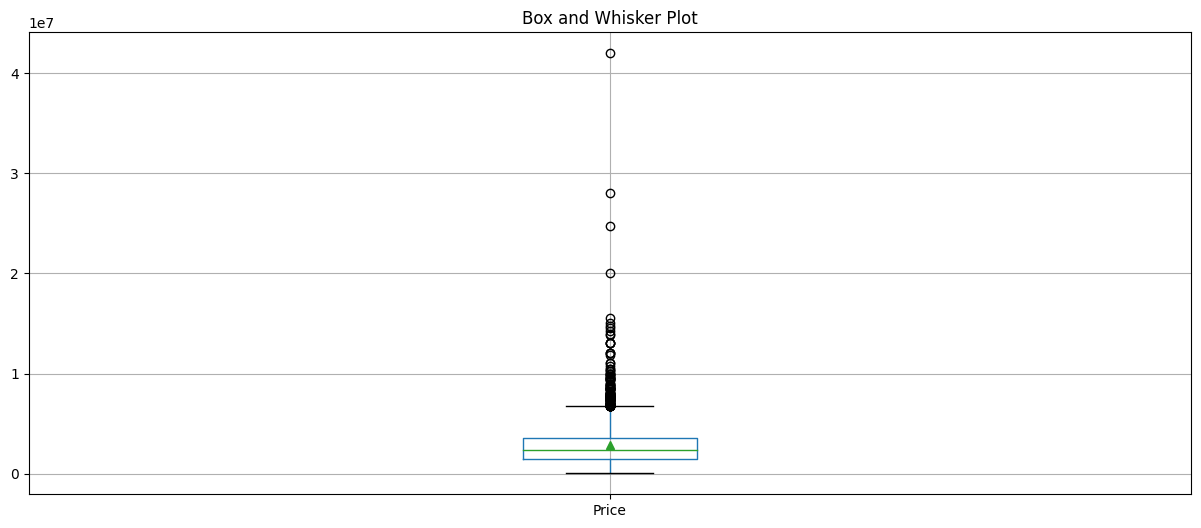

In [44]:
plt.figure(figsize=(15, 6))
Housing_data.boxplot(column=['Price'], showmeans=True)
plt.title('Box and Whisker Plot')
plt.show()


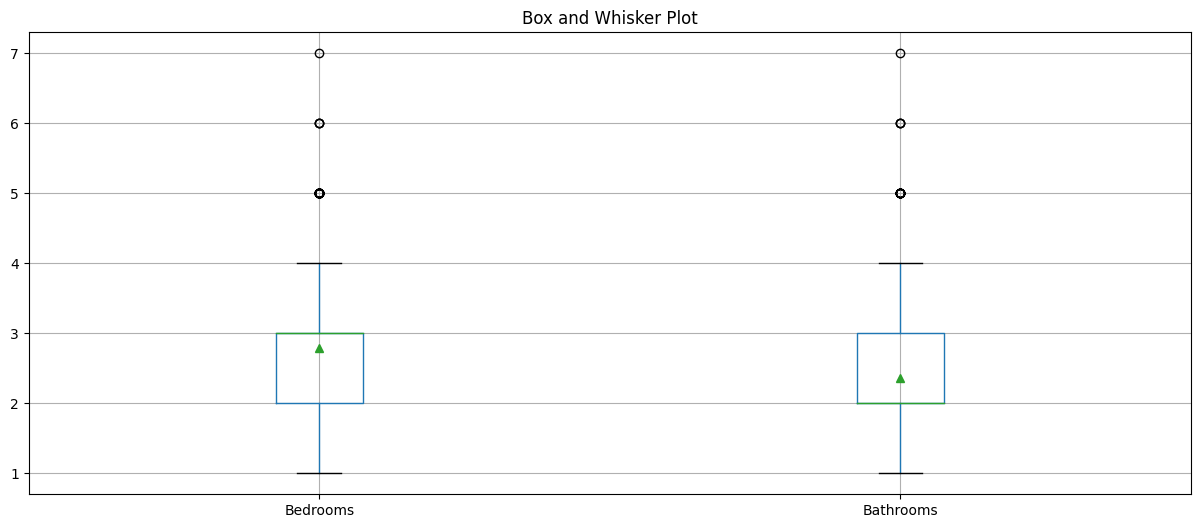

In [45]:
plt.figure(figsize=(15, 6))
Housing_data.boxplot(column=['Bedrooms','Bathrooms'], showmeans=True)
plt.title('Box and Whisker Plot')
plt.show()

In [47]:
Housing_data.to_csv('Housing_data_Done_Phase(1).csv', index=False)
files.download('Housing_data_Done_Phase(1).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>